Epoch [1/100], Batch [0/2], Loss: 0.3794
Epoch [1/100], Batch [1/2], Loss: 0.3705
Epoch [2/100], Batch [0/2], Loss: 0.3756
Epoch [2/100], Batch [1/2], Loss: 0.3560
Epoch [3/100], Batch [0/2], Loss: 0.3622
Epoch [3/100], Batch [1/2], Loss: 0.3583
Epoch [4/100], Batch [0/2], Loss: 0.3491
Epoch [4/100], Batch [1/2], Loss: 0.3596
Epoch [5/100], Batch [0/2], Loss: 0.3513
Epoch [5/100], Batch [1/2], Loss: 0.3369
Epoch [6/100], Batch [0/2], Loss: 0.3402
Epoch [6/100], Batch [1/2], Loss: 0.3354
Epoch [7/100], Batch [0/2], Loss: 0.3383
Epoch [7/100], Batch [1/2], Loss: 0.3180
Epoch [8/100], Batch [0/2], Loss: 0.3175
Epoch [8/100], Batch [1/2], Loss: 0.3300
Epoch [9/100], Batch [0/2], Loss: 0.3166
Epoch [9/100], Batch [1/2], Loss: 0.3107
Epoch [10/100], Batch [0/2], Loss: 0.3105
Epoch [10/100], Batch [1/2], Loss: 0.3021
Epoch [11/100], Batch [0/2], Loss: 0.2943
Epoch [11/100], Batch [1/2], Loss: 0.3012
Epoch [12/100], Batch [0/2], Loss: 0.2871
Epoch [12/100], Batch [1/2], Loss: 0.2810
Epoch [13/

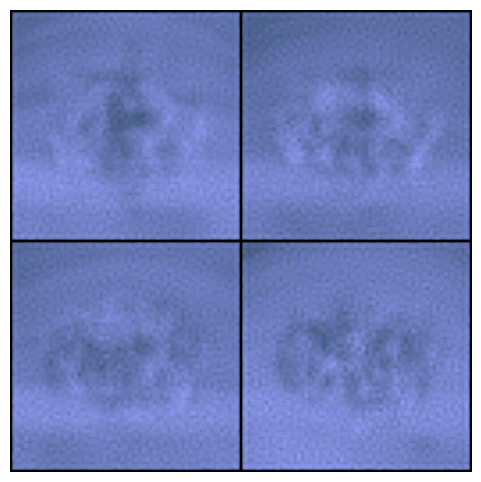

Training complete.


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision.utils as vutils



class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.fc = nn.Linear(latent_dim, 16 * 64 * 64)
        self.conv1 = nn.ConvTranspose2d(in_channels=16, out_channels=8, kernel_size=4, stride=2, padding=1)  # Upsample to 128x128
        self.conv2 = nn.ConvTranspose2d(in_channels=8, out_channels=3, kernel_size=4, stride=2, padding=1)   # Upsample to 256x256

    def forward(self, z):
        x = self.fc(z)
        x = x.view(-1, 16, 64, 64)  # Reshape to feature map size
        x = (self.conv1(x))
        x = (self.conv2(x)) 
        return x

#  Load the Dataset
data_transforms = transforms.Compose([
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(root='dataset/Train', transform=data_transforms)
dataloader = DataLoader(dataset, batch_size=50, shuffle=True)

latent_dim = 100  # Size of the latent vector
generator = Generator(latent_dim)
optimizer = optim.Adam(generator.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Train the Generator
num_epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)

# Function to visualize generated images
def show_generated_images(generator, latent_dim, device, num_images=4):
    generator.eval()  # Set to evaluation mode
    with torch.no_grad():  # No gradients needed for inference
        z = torch.randn(num_images, latent_dim).to(device)  # Generate random noise
        generated_images = generator(z).cpu()  # Move to CPU for visualization
        generated_images = (generated_images - generated_images.min()) / (generated_images.max() - generated_images.min())  # Normalize to [0,1]
    
    grid = vutils.make_grid(generated_images, nrow=2, normalize=True)  # Create a grid of images
    plt.figure(figsize=(6,6))
    plt.imshow(grid.permute(1, 2, 0))  # Convert from (C, H, W) to (H, W, C) for display
    plt.axis("off")
    plt.show()

    
for epoch in range(num_epochs):
    for batch_idx, (data, _) in enumerate(dataloader):
        data = data.to(device)
        batch_size = data.size(0)
        
        # Sample random latent vectors
        z = torch.randn(batch_size, latent_dim).to(device)
        
        optimizer.zero_grad()
        
        generated_images = generator(z)
        loss = criterion(generated_images, data)
        
        loss.backward()
        optimizer.step()
        
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx}/{len(dataloader)}], Loss: {loss.item():.4f}")

show_generated_images(generator, latent_dim, device)
print("Training complete.")

Epoch [1/30], Batch [0/2], D Loss: 1.3845, G Loss: 0.7400
Epoch [2/30], Batch [0/2], D Loss: 1.3220, G Loss: 0.7661
Epoch [3/30], Batch [0/2], D Loss: 1.2663, G Loss: 0.7979
Epoch [4/30], Batch [0/2], D Loss: 1.2020, G Loss: 0.8434
Epoch [5/30], Batch [0/2], D Loss: 1.1393, G Loss: 0.8917
Epoch [6/30], Batch [0/2], D Loss: 1.0767, G Loss: 0.9421
Epoch [7/30], Batch [0/2], D Loss: 1.0114, G Loss: 1.0033
Epoch [8/30], Batch [0/2], D Loss: 0.9430, G Loss: 1.0767
Epoch [9/30], Batch [0/2], D Loss: 0.8853, G Loss: 1.1468
Epoch [10/30], Batch [0/2], D Loss: 0.8160, G Loss: 1.2426
Epoch [11/30], Batch [0/2], D Loss: 0.7532, G Loss: 1.3432
Epoch [12/30], Batch [0/2], D Loss: 0.6914, G Loss: 1.4495
Epoch [13/30], Batch [0/2], D Loss: 0.6367, G Loss: 1.5705
Epoch [14/30], Batch [0/2], D Loss: 0.5880, G Loss: 1.7083
Epoch [15/30], Batch [0/2], D Loss: 0.5401, G Loss: 1.8791
Epoch [16/30], Batch [0/2], D Loss: 0.5001, G Loss: 2.0481
Epoch [17/30], Batch [0/2], D Loss: 0.4648, G Loss: 2.2170
Epoch 

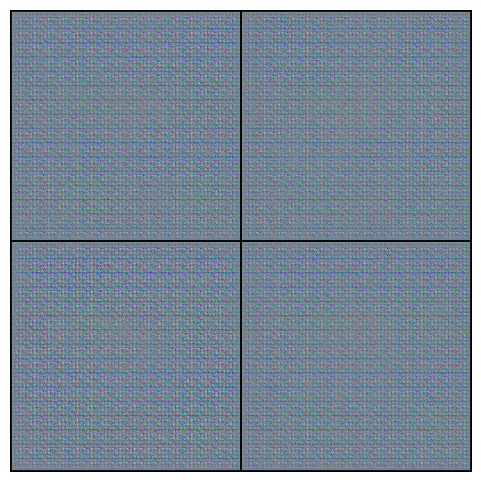

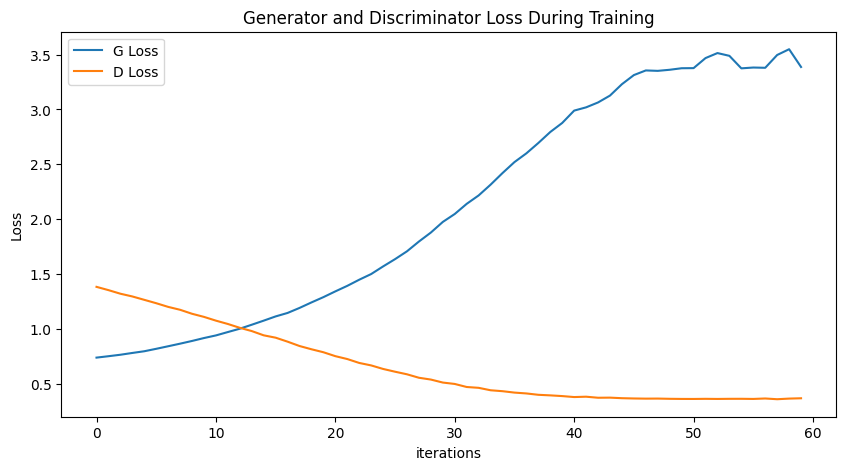

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the Generator
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.fc = nn.Linear(latent_dim, 128 * 8 * 8)  # Increase feature maps
        self.bn1 = nn.BatchNorm1d(128 * 8 * 8)

        self.conv1 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)  # 16x16
        self.bn2 = nn.BatchNorm2d(64)
        
        self.conv2 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1)  # 32x32
        self.bn3 = nn.BatchNorm2d(32)

        self.conv3 = nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1)  # 64x64
        self.bn4 = nn.BatchNorm2d(16)

        self.conv4 = nn.ConvTranspose2d(16, 8, kernel_size=4, stride=2, padding=1)  # 128x128
        self.bn5 = nn.BatchNorm2d(8)

        self.conv5 = nn.ConvTranspose2d(8, 3, kernel_size=4, stride=2, padding=1)  # 256x256

        self.leaky_relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, z):
        x = self.fc(z)
        x = self.bn1(x)
        x = x.view(-1, 128, 8, 8)  # Reshape to 8x8 feature map

        x = self.conv1(x)
        x = self.bn2(x)
        x = self.leaky_relu(x)

        x = self.conv2(x)
        x = self.bn3(x)
        x = self.leaky_relu(x)

        x = self.conv3(x)
        x = self.bn4(x)
        x = self.leaky_relu(x)

        x = self.conv4(x)
        x = self.bn5(x)
        x = self.leaky_relu(x)

        x = self.conv5(x)
        x = self.sigmoid(x)

        return x

# Define the Discriminator
# class Discriminator(nn.Module):
#     def __init__(self):
#         super(Discriminator, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=4, stride=2, padding=1)  # Downsample to 128x128
#         self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=4, stride=2, padding=1)  # Downsample to 64x64
#         self.fc = nn.Linear(16 * 64 * 64, 1)
#         self.leaky_relu = nn.LeakyReLU(0.2)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.leaky_relu(self.conv1(x))
#         x = self.leaky_relu(self.conv2(x))
#         x = x.view(-1, 16 * 64 * 64)  # Flatten
#         x = self.fc(x)
#         x = self.sigmoid(x)  # Output probability
#         return x

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=4, stride=2, padding=1)
        self.fc = nn.Linear(16 * 64 * 64, 1)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.leaky_relu(self.conv1(x))
        x = self.leaky_relu(self.conv2(x))
        x = x.view(-1, 16 * 64 * 64)
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

# Load the Dataset
data_transforms = transforms.Compose([transforms.ToTensor(),])

dataset = datasets.ImageFolder(root='dataset/Train', transform=data_transforms)
dataloader = DataLoader(dataset, batch_size=5, shuffle=True)

latent_dim = 30  # Size of the latent vector
generator = Generator(latent_dim)
discriminator = Discriminator()

optimizer_g = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0001)

criterion = nn.BCELoss()

# Lists to store loss values
g_losses = []
d_losses = []

# Train the GAN
num_epochs = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)
discriminator.to(device)

for epoch in range(num_epochs):
    for batch_idx, (data, _) in enumerate(dataloader):
        batch_size = data.size(0)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        data = data.to(device)
        optimizer_d.zero_grad()
        
        # Real images
        real_outputs = discriminator(data)
        d_loss_real = criterion(real_outputs, real_labels)
        
        # Fake images
        z = torch.randn(batch_size, latent_dim).to(device)
        generated_images = generator(z).detach()
        fake_outputs = discriminator(generated_images)
        d_loss_fake = criterion(fake_outputs, fake_labels)
        
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_d.step()
        d_losses.append(d_loss.item())

        # Train Generator
        optimizer_g.zero_grad()
        z = torch.randn(batch_size, latent_dim).to(device)
        generated_images = generator(z)
        g_outputs = discriminator(generated_images)
        g_loss = criterion(g_outputs, real_labels)  # Generator wants discriminator to think these are real
        g_loss.backward()
        optimizer_g.step()
        g_losses.append(g_loss.item())

        if batch_idx % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx}/{len(dataloader)}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

print("Training complete.")
show_generated_images(generator, latent_dim, device, num_images=4)
# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(g_losses, label="G Loss")
plt.plot(d_losses, label="D Loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()